# TargetÏùò dtypeÏù¥ floatÏù¥ ÏïÑÎãå intÎùºÎ©¥, Î∂ÑÎ•òÌòïÏù∏ÎìØÌïòÏó¨ Î∂ÑÎ•òÌòï Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÎπÑÍµêÌïòÎäî ÌååÏùºÏùÑ ÎßåÎì§ÏóàÏäµÎãàÎã§

In [115]:
import pandas as pd

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ 
data = pd.read_csv('/Users/jangjinseul/Desktop/SKN13/08_Î®∏Ïã†Îü¨Îãù/datasets/2010-new-york-state-hospital-inpatient-discharge/hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv')
data.head(10)
print(data.shape)

/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_98489/49964933.py:4: DtypeWarning: Columns (1,2,7,11,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/jangjinseul/Desktop/SKN13/08_Î®∏Ïã†Îü¨Îãù/datasets/2010-new-york-state-hospital-inpatient-discharge/hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv')


(2622133, 38)


In [ ]:
# 1. Î¨∏ÏûêÏó¥ Îì± ÎπÑÏ†ïÏÉÅÏ†ÅÏù∏ Í∞íÏùÄ NaNÏúºÎ°ú Î≥ÄÌôò
data['Length of Stay'] = pd.to_numeric(data['Length of Stay'], errors='coerce')

# 2. NaNÏù¥ Îêú ÌñâÏùÄ Ï†úÍ±∞
df = data.dropna(subset=['Length of Stay'])

# 3. float ‚Üí int Î°ú ÌòïÎ≥ÄÌôò (NaN Ï†úÍ±∞ÎêòÏóàÏúºÎØÄÎ°ú ÏïàÏ†Ñ)
df['Length of Stay'] = df['Length of Stay'].astype(int)

print(df.shape, df['Length of Stay'].dtype)


(2619918, 38) int64


/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_98489/3003604707.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Length of Stay'] = df['Length of Stay'].astype(int)


KeyboardInterrupt: 

In [ ]:
# target Ïª¨ÎüºÍ∞í type ÌôïÏù∏.
df['Length of Stay'].apply(type).value_counts()

Length of Stay
<class 'int'>    2619918
Name: count, dtype: int64

In [ ]:
# nan Í∞úÏàò
print(df.isna().sum())

index                                        0
Health Service Area                       4887
Hospital County                           4887
Operating Certificate Number              4887
Facility ID                               4887
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                       3195
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                        103
Discharge Year                               0
CCS Diagnosis Code                        2273
CCS Diagnosis Description                 2273
CCS Procedure Code                        2273
CCS Procedure Description                 2273
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code 

In [ ]:
# nan Í∞úÏàòÍ∞Ä ÎßåÎã®ÏúÑÎ•º ÎÑòÎäî Ïª¨Îüº ÏÇ≠Ï†ú
nan_columns = df.columns[df.isna().sum() > 10_000]
df = df.drop(columns=nan_columns)
nan_columns, df.columns

(Index(['Source of Payment 2', 'Source of Payment 3',
        'Operating Provider License Number', 'Other Provider License Number'],
       dtype='object'),
 Index(['index', 'Health Service Area', 'Hospital County',
        'Operating Certificate Number', 'Facility ID', 'Facility Name',
        'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity',
        'Length of Stay', 'Type of Admission', 'Patient Disposition',
        'Discharge Year', 'CCS Diagnosis Code', 'CCS Diagnosis Description',
        'CCS Procedure Code', 'CCS Procedure Description', 'APR DRG Code',
        'APR DRG Description', 'APR MDC Code', 'APR MDC Description',
        'APR Severity of Illness Code', 'APR Severity of Illness Description',
        'APR Risk of Mortality', 'APR Medical Surgical Description',
        'Source of Payment 1', 'Attending Provider License Number',
        'Birth Weight', 'Abortion Edit Indicator',
        'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
   

In [ ]:
# Object typeÏù∏ Ïª¨ÎüºÏùò ÏÑ∏Î∂Ä dtype ÌôïÏù∏ > nanÏùÄ float type
# float typeÏùò Í∞úÏàòÏôÄ nan Í∞úÏàòÍ∞Ä Í∞ôÏùå
for col in df.select_dtypes(include='object').columns:
    print(f"Ïª¨Îüº: {col}")
    print(df[col].apply(type).value_counts(), "\n")

Ïª¨Îüº: Health Service Area
Health Service Area
<class 'str'>      2615031
<class 'float'>       4887
Name: count, dtype: int64 

Ïª¨Îüº: Hospital County
Hospital County
<class 'str'>      2615031
<class 'float'>       4887
Name: count, dtype: int64 

Ïª¨Îüº: Facility Name
Facility Name
<class 'str'>    2619918
Name: count, dtype: int64 

Ïª¨Îüº: Age Group
Age Group
<class 'str'>    2619918
Name: count, dtype: int64 

Ïª¨Îüº: Zip Code - 3 digits
Zip Code - 3 digits
<class 'str'>      2060205
<class 'int'>       523790
<class 'float'>      35923
Name: count, dtype: int64 

Ïª¨Îüº: Gender
Gender
<class 'str'>    2619918
Name: count, dtype: int64 

Ïª¨Îüº: Race
Race
<class 'str'>    2619918
Name: count, dtype: int64 

Ïª¨Îüº: Ethnicity
Ethnicity
<class 'str'>    2619918
Name: count, dtype: int64 

Ïª¨Îüº: Type of Admission
Type of Admission
<class 'str'>    2619918
Name: count, dtype: int64 

Ïª¨Îüº: Patient Disposition
Patient Disposition
<class 'str'>      2619815
<class 'float'>       

In [ ]:
# Ïª¨ÎüºÎ≥Ñ ÌÉÄÏûÖ ÌôïÏù∏
# Total Charges, Total Costs > Ïù¥ ÎëêÍ∞ú Ïª¨ÎüºÎßå float
# ÎÇòÎ®∏ÏßÄ Ïª¨ÎüºÏùò Ïà´Ïûê Îç∞Ïù¥ÌÑ∞Îäî Î™®Îëê 1Î°ú ÎÇòÎà†Îñ®Ïñ¥ÏßÑÎã§. Ïã§ÏßÅÏ†ÅÏù∏ int >> Î™®Îëê Î≤îÏ£ºÌòï
df[df['Birth Weight'].fillna(0) % 1 != 0]

Empty DataFrame
Columns: [index, Health Service Area, Hospital County, Operating Certificate Number, Facility ID, Facility Name, Age Group, Zip Code - 3 digits, Gender, Race, Ethnicity, Length of Stay, Type of Admission, Patient Disposition, Discharge Year, CCS Diagnosis Code, CCS Diagnosis Description, CCS Procedure Code, CCS Procedure Description, APR DRG Code, APR DRG Description, APR MDC Code, APR MDC Description, APR Severity of Illness Code, APR Severity of Illness Description, APR Risk of Mortality, APR Medical Surgical Description, Source of Payment 1, Attending Provider License Number, Birth Weight, Abortion Edit Indicator, Emergency Department Indicator, Total Charges, Total Costs]
Index: []

[0 rows x 34 columns]

In [ ]:
# Ïö∞Ìé∏Î≤àÌò∏ Ïª¨Îüº ÏÇ≠Ï†ú
df = df.drop(columns=['Zip Code - 3 digits'])

In [ ]:
# index Ïª¨Îüº ÏÇ≠Ï†ú
df = df.drop(columns=['index', 'Attending Provider License Number', 'Operating Certificate Number'])

In [ ]:
print(df.columns)

Index(['Health Service Area', 'Hospital County', 'Facility ID',
       'Facility Name', 'Age Group', 'Gender', 'Race', 'Ethnicity',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'Discharge Year', 'CCS Diagnosis Code', 'CCS Diagnosis Description',
       'CCS Procedure Code', 'CCS Procedure Description', 'APR DRG Code',
       'APR DRG Description', 'APR MDC Code', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'APR Medical Surgical Description',
       'Source of Payment 1', 'Birth Weight', 'Abortion Edit Indicator',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')


In [ ]:
df['Length of Stay']

0           1
1          15
2           3
3           5
4           4
           ..
2622128    29
2622129     1
2622130     4
2622131     1
2622132     1
Name: Length of Stay, Length: 2619918, dtype: int64

In [ ]:
pd.set_option('display.max_columns', None)
# df.head(10)
df.columns

Index(['Health Service Area', 'Hospital County', 'Facility ID',
       'Facility Name', 'Age Group', 'Gender', 'Race', 'Ethnicity',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'Discharge Year', 'CCS Diagnosis Code', 'CCS Diagnosis Description',
       'CCS Procedure Code', 'CCS Procedure Description', 'APR DRG Code',
       'APR DRG Description', 'APR MDC Code', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'APR Medical Surgical Description',
       'Source of Payment 1', 'Birth Weight', 'Abortion Edit Indicator',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')

In [ ]:
# Í≥†Ïú†Í∞í Í∞úÏàò ÌôïÏù∏
df.nunique()

Health Service Area                          8
Hospital County                             57
Facility ID                                225
Facility Name                              225
Age Group                                    5
Gender                                       3
Race                                         4
Ethnicity                                    3
Length of Stay                             119
Type of Admission                            6
Patient Disposition                         19
Discharge Year                               1
CCS Diagnosis Code                         262
CCS Diagnosis Description                  262
CCS Procedure Code                         232
CCS Procedure Description                  232
APR DRG Code                               316
APR DRG Description                        316
APR MDC Code                                26
APR MDC Description                         26
APR Severity of Illness Code                 5
APR Severity 

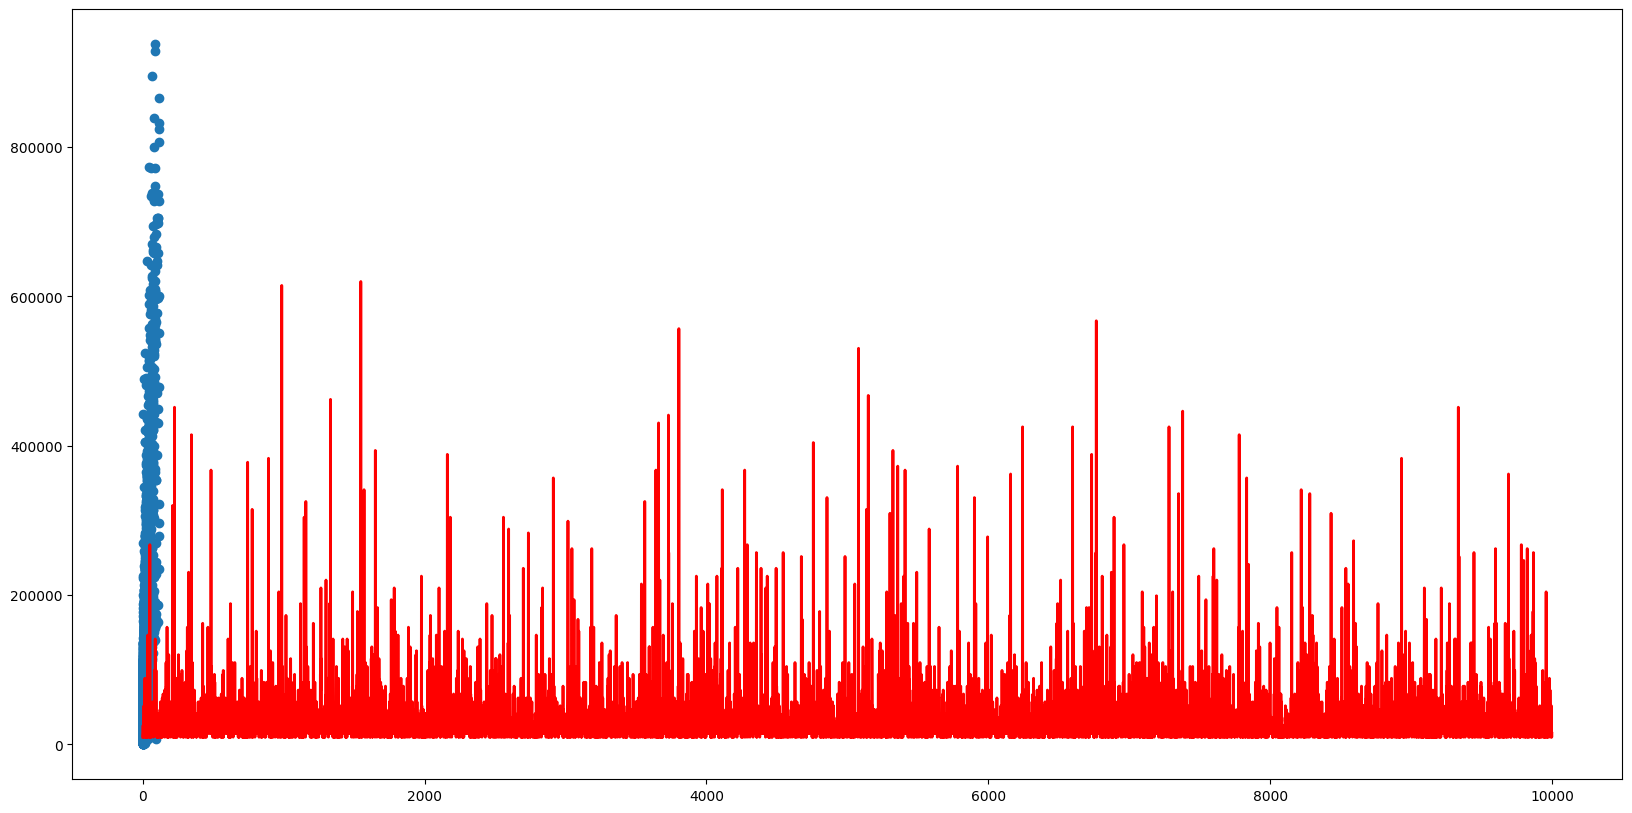

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df_test = df.dropna(subset=['Total Charges']).head(50000)
X_train, X_test, y_train, y_test = train_test_split(df_test[['Length of Stay']], df_test['Total Charges'], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

plt.figure(figsize=(20, 10))
plt.scatter(df_test['Length of Stay'], df_test['Total Charges'], marker='o')
plt.plot(pred, color='red', linewidth=2)
plt.show()  

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import KNNImputer, SimpleImputer

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [ ]:

# -------------------------------
# ÎåÄÎûµÏ†ÅÏù∏ Î™®Îç∏Î≥Ñ ÏÑ±Îä• ÎπÑÍµê
# -------------------------------

# Í≥†Ïú†Í∞íÏù¥ Îßå Îã®ÏúÑ Ïù¥ÏÉÅÏùÄ Ïó∞ÏÜçÌòï, ÎÇòÎ®∏ÏßÑ Î≤îÏ£ºÌòï + Birth WeightÎäî Ïó∞ÏÜçÌòï
num_columns = ['Total Charges', 'Total Costs', 'Length of Stay', 'Birth Weight'] # Ïó∞ÏÜçÌòï Ïª¨Îüº
cate_columns = [col for col in df.columns
                if col not in num_columns + ['Patient Disposition']] # Î≤îÏ£ºÌòï Ïª¨Îüº



In [ ]:

# -------------------------------
# Í≥µÌÜµ Ï†ÑÏ≤òÎ¶¨ ÌååÏù¥ÌîÑÎùºÏù∏ Íµ¨ÏÑ±
# -------------------------------
cat_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
)

num_pipeline = make_pipeline(
    KNNImputer(n_neighbors=5),
    StandardScaler()
)

preprocessor = ColumnTransformer([
    ('cat', cat_pipeline, cate_columns),
    ('num', num_pipeline, num_columns)
])


In [ ]:

# -------------------------------
# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
# -------------------------------
X = df.drop(columns=['Patient Disposition'])
y = np.where(df['Patient Disposition'].values == 'Left Against Medical Advice', 1, 0)


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.05, test_size=0.001, random_state=42)


In [ ]:

# -------------------------------
# ÏÇ¨Ïö©Ìï† ÌöåÍ∑Ä Î™®Îç∏ Ï†ïÏùò
# -------------------------------
models = {
    'LogisticRegression' : LogisticRegression(),
    # 'Linear Regression': LinearRegression(),
    # 'Ridge Regression': Ridge(),
    # 'Lasso Regression': Lasso(),
    # 'Decision Tree': DecisionTreeClassifier(),
    # 'Random Forest': RandomForestClassifier(),
    # 'Gradient Boosting': GradientBoostingRegressor(),
    # 'Support Vector Regression': SVR()
}


In [ ]:

# -------------------------------
# Î™®Îç∏ ÌïôÏäµ Î∞è ÏÑ±Îä• ÎπÑÍµê
# -------------------------------

results = []
target_model = None
print("="*20, "Ïù¥ÏßÑ Î∂ÑÎ•ò Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê", "="*20)
for name, model in models.items():
    pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred_proba = pipeline.predict_proba(X_test)
    y_pred = np.where(y_pred_proba[:, 1] > 0.3, 1, 0)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

    print(f"[{name}] Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

    target_model = model
    


==================== Ïù¥ÏßÑ Î∂ÑÎ•ò Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê ====================
[LogisticRegression] Accuracy: 0.9794, Precision: 0.3000, Recall: 0.0600, F1 Score: 0.1000


/Users/jangjinseul/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# -------------------------------
# Í≤∞Í≥º Ï†ïÎ¶¨ Ï∂úÎ†•
# -------------------------------
results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
print("\nüìä Î∂ÑÎ•ò Î™®Îç∏ ÏÑ±Îä• ÏöîÏïΩ (F1 Score Í∏∞Ï§Ä Ï†ïÎ†¨):")
print(results_df)




üìä Î∂ÑÎ•ò Î™®Îç∏ ÏÑ±Îä• ÏöîÏïΩ (F1 Score Í∏∞Ï§Ä Ï†ïÎ†¨):
                Model  Accuracy  Precision  Recall  F1 Score
0  LogisticRegression  0.979389        0.3    0.06       0.1


confusion_matrix(y Ïã§Ï†úÍ∞í, y ÏòàÏ∏°Í∞í)
recall_score(y Ïã§Ï†úÍ∞í, y ÏòàÏ∏°Í∞í)
precision_score(y Ïã§Ï†úÍ∞í, y ÏòàÏ∏°Í∞í)
f1_score(y Ïã§Ï†úÍ∞í, y ÏòàÏ∏°Í∞í)
classification_report(y Ïã§Ï†úÍ∞í, y ÏòàÏ∏°Í∞í)


In [ ]:
from sklearn.metrics import (
        confusion_matrix,
        ConfusionMatrixDisplay, # confusion matrix ÏãúÍ∞ÅÌôîÌÅ¥ÎûòÏä§
        accuracy_score,
        recall_score, 
        precision_score,
        f1_score,
        classification_report
)

In [ ]:
##### DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Î™®Îç∏ ÏÉùÏÑ±
tree = DecisionTreeClassifier(max_depth=3)

# pipeline Íµ¨ÏÑ± (preprocessor + model)
tree_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Î∞òÎìúÏãú ÏÇ¨Ï†Ñ Íµ¨ÏÑ±Ìïú Ï†ÑÏ≤òÎ¶¨ ÌååÏù¥ÌîÑÎùºÏù∏ ÏÇ¨Ïö©
    ('tree', tree)
])

# ÌïôÏäµ
tree_pipeline.fit(X_train, y_train)

# Ï∂îÎ°†
pred_train_tree = tree_pipeline.predict(X_train)
pred_test_tree = tree_pipeline.predict(X_test)

# ÏÑ±Îä• ÌèâÍ∞Ä
print("Train Accuracy:", accuracy_score(y_train, pred_train_tree))
print("Test Accuracy:", accuracy_score(y_test, pred_test_tree))


Train Accuracy: 0.9847627772052369
Test Accuracy: 0.9874045801526717


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# ÌòºÎèôÌñâÎ†¨ Í≥ÑÏÇ∞
cm = confusion_matrix(y_test, pred_test_tree)

# ÌòºÎèôÌñâÎ†¨Ïùò Í∞Å ÏöîÏÜå
TN, FP, FN, TP = cm.ravel()

# ÏÑ±Îä•ÏßÄÌëú Í≥ÑÏÇ∞
accuracy = accuracy_score(y_test, pred_test_tree)
precision = precision_score(y_test, pred_test_tree, zero_division=0)
recall = recall_score(y_test, pred_test_tree, zero_division=0)  # sensitivityÏôÄ ÎèôÏùº
f1 = f1_score(y_test, pred_test_tree, zero_division=0)
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
fall_out = FP / (FP + TN) if (FP + TN) > 0 else 0

# Í≤∞Í≥º Ï∂úÎ†•
print("üìä Î∂ÑÎ•ò ÏÑ±Îä• ÌèâÍ∞Ä")
print(f"Accuracy    : {accuracy:.4f}")
print(f"Precision   : {precision:.4f}")
print(f"Recall      : {recall:.4f} (Sensitivity)")
print(f"F1 Score    : {f1:.4f}")
print(f"Specificity : {specificity:.4f}")
print(f"Fall out    : {fall_out:.4f}")


üìä Î∂ÑÎ•ò ÏÑ±Îä• ÌèâÍ∞Ä
Accuracy    : 0.9874
Precision   : 1.0000
Recall      : 0.3400 (Sensitivity)
F1 Score    : 0.5075
Specificity : 1.0000
Fall out    : 0.0000


In [ ]:
# Confusion Matrix
cm_train = confusion_matrix(y_train, pred_train_tree)
cm_test =  confusion_matrix(y_test, pred_test_tree)

print(f"train set\n{cm_train}")
print("-"* 20)
print(f"test set\n{cm_test}")

train set
[[128158      0]
 [  1996    841]]
--------------------
test set
[[2570    0]
 [  33   17]]


In [ ]:
# train set
TN_train, FP_train, FN_train, TP_train = 1922241, 0, 29797, 12900

accuracy_train = (TP_train + TN_train) / (TP_train + TN_train + FP_train + FN_train)
precision_train = TP_train / (TP_train + FP_train) if (TP_train + FP_train) > 0 else 0
recall_train = TP_train / (TP_train + FN_train)
f1_train = 2 * (precision_train * recall_train) / (precision_train + recall_train)
specificity_train = TN_train / (TN_train + FP_train)
fall_out_train = FP_train / (FP_train + TN_train)

print("üìå Train set Í≤∞Í≥º")
print("-"*30)
print(f"Accuracy: {accuracy_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"F1 Score: {f1_train:.4f}")
print(f"Specificity: {specificity_train:.4f}")
print(f"Fall out: {fall_out_train:.4f}")

print("-"*30)


üìå Train set Í≤∞Í≥º
------------------------------
Accuracy: 0.9848
Precision: 1.0000
Recall: 0.3021
F1 Score: 0.4641
Specificity: 1.0000
Fall out: 0.0000
------------------------------


In [ ]:
# test set
TN_test, FP_test, FN_test, TP_test = 640748, 0, 9882, 4350

accuracy_test = (TP_test + TN_test) / (TP_test + TN_test + FP_test + FN_test)
precision_test = TP_test / (TP_test + FP_test) if (TP_test + FP_test) > 0 else 0
recall_test = TP_test / (TP_test + FN_test)
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
specificity_test = TN_test / (TN_test + FP_test)
fall_out_test = FP_test / (FP_test + TN_test)

print("üìå Test set Í≤∞Í≥º")
print("-"*30)
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print(f"Specificity: {specificity_test:.4f}")
print(f"Fall out: {fall_out_test:.4f}")

print("-"*30)

üìå Test set Í≤∞Í≥º
------------------------------
Accuracy: 0.9849
Precision: 1.0000
Recall: 0.3056
F1 Score: 0.4682
Specificity: 1.0000
Fall out: 0.0000
------------------------------


In [ ]:
# Ï†ïÌôïÎèÑ
print("DecisionTree Ï†ïÌôïÎèÑ(Accuracy)")
print(f"Trainset : {accuracy_score(y_train, pred_train_tree)},Testset: {accuracy_score(y_test, pred_test_tree)}")

# Ï†ïÎ∞ÄÎèÑ
print("DecsionTree Ï†ïÎ∞ÄÎèÑ(Precision) - 1Í∏∞Ï§Ä")
print(f"Trainset : {precision_score(y_train, pred_train_tree)}, Testset: {precision_score(y_test, pred_test_tree)}")

# Ïû¨ÌòÑÏú®
print("DecisionTree Ïû¨ÌòÑÏú®(Recall)")
print(f"Trainset : {recall_score(y_train, pred_train_tree)}, Testset: {recall_score(y_test, pred_test_tree)}")

# F1 score
print("DecisionTree F1 score")
print(f"Trainset : {f1_score(y_train, pred_train_tree)}, Testset: {f1_score(y_test, pred_test_tree)}")

DecisionTree Ï†ïÌôïÎèÑ(Accuracy)
Trainset : 0.9847627772052369,Testset: 0.9874045801526717
DecsionTree Ï†ïÎ∞ÄÎèÑ(Precision) - 1Í∏∞Ï§Ä
Trainset : 1.0, Testset: 1.0
DecisionTree Ïû¨ÌòÑÏú®(Recall)
Trainset : 0.29643990130419456, Testset: 0.34
DecisionTree F1 score
Trainset : 0.4573137574768896, Testset: 0.5074626865671642


In [ ]:
print("---------------Train set Classification Report---------------")
print(classification_report(y_train, pred_train_tree))

---------------Train set Classification Report---------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    128158
           1       1.00      0.30      0.46      2837

    accuracy                           0.98    130995
   macro avg       0.99      0.65      0.72    130995
weighted avg       0.98      0.98      0.98    130995



In [ ]:
print("---------------Test set Classification Report---------------")
print(classification_report(y_test, pred_test_tree))

---------------Test set Classification Report---------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2570
           1       1.00      0.34      0.51        50

    accuracy                           0.99      2620
   macro avg       0.99      0.67      0.75      2620
weighted avg       0.99      0.99      0.98      2620



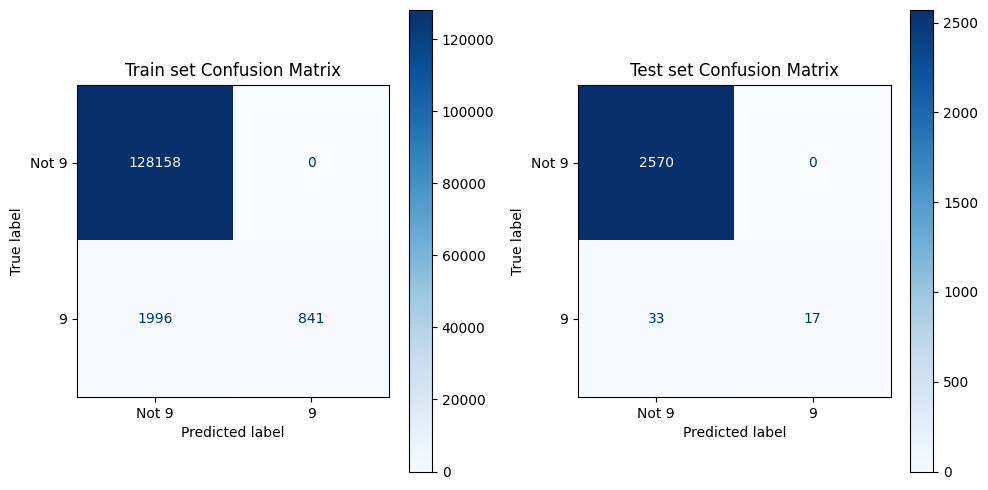

In [ ]:
# -------------------------------
# ÏãúÍ∞ÅÌôî Ï∂úÎ†•
# -------------------------------

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

disp_train = ConfusionMatrixDisplay(
    cm_train, #confusion matrix
    display_labels=['Not 9', '9']       # [ÏùåÏÑ±Î†àÏù¥Î∏î, ÏñëÏÑ±Î†àÏù¥Î∏î]
)
disp_train.plot(cmap='Blues', ax=ax1)    # Ï∂úÎ†•

disp_test = ConfusionMatrixDisplay(
    cm_test, #confusion matrix
    display_labels=['Not 9', '9']) 

disp_test.plot(cmap='Blues', ax=ax2)

ax1.set_title("Train set Confusion Matrix")
ax2.set_title("Test set Confusion Matrix")
plt.tight_layout()
plt.show()

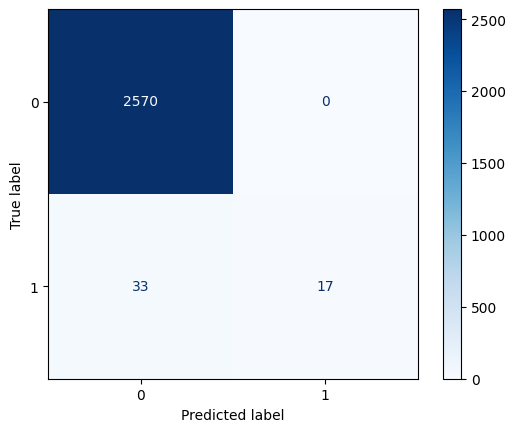

In [ ]:
disp_test = ConfusionMatrixDisplay(cm_test) 
disp_test.plot(cmap="Blues");

In [ ]:
###### RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Î™®Îç∏ ÏÉùÏÑ±
rfc = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=0)

# ÌååÏù¥ÌîÑÎùºÏù∏ Íµ¨ÏÑ± (preprocessor + RFC)
rfc_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Ïù¥Ï†ÑÏóê Ï†ïÏùòÌïú Ï†ÑÏ≤òÎ¶¨ ÌååÏù¥ÌîÑÎùºÏù∏ ÏÇ¨Ïö©
    ('rfc', rfc)
])

# ÌïôÏäµ (preprocessor ÏûêÎèô Ï†ÅÏö©)
rfc_pipeline.fit(X_train, y_train)

# Ï∂îÎ°† (Ï†ÑÏ≤òÎ¶¨ ÏûêÎèô Ï†ÅÏö©Îê®)
pred_train_rfc = rfc_pipeline.predict(X_train)
pred_test_rfc = rfc_pipeline.predict(X_test)

# Ï†ïÌôïÎèÑ Îì± ÌèâÍ∞Ä Í∞ÄÎä•
from sklearn.metrics import accuracy_score
print("Train Accuracy:", accuracy_score(y_train, pred_train_rfc))
print("Test Accuracy:", accuracy_score(y_test, pred_test_rfc))

Train Accuracy: 0.9847627772052369
Test Accuracy: 0.9874045801526717


In [ ]:
# Confusion Matrix
cm_train_rfc = confusion_matrix(y_train, pred_train_rfc)
cm_train_rfc

array([[128158,      0],
       [  1996,    841]])

/Users/jangjinseul/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jangjinseul/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jangjinseul/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49707 (\N{HANGUL SYLLABLE SUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jangjinseul/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


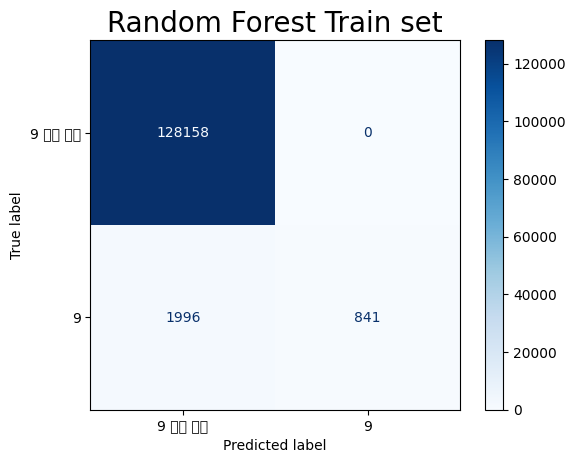

In [ ]:
## Confusion Matrix Display
# ÏãúÍ∞ÅÌôî - matplotlib Î•º Ïù¥Ïö©Ìï¥ plotting
### Trainset Confusion MatrixÎßå ÏãúÍ∞ÅÌôî.
cm_display2 = ConfusionMatrixDisplay(cm_train_rfc, display_labels=["9 Ïù¥Ïô∏ Ïà´Ïûê", "9"])
cm_display2.plot(cmap="Blues")
plt.title("Random Forest Train set", fontsize=20)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Patient Disposition'])
y = np.where(df['Patient Disposition'] == 'Left Against Medical Advice', 1, 0)

# train_size=0.05Î°ú Ï§ÑÏù∏ Ï†ÅÏù¥ ÏûàÎã§Î©¥ ÎèôÏùºÌïòÍ≤å Ïú†ÏßÄÌïòÏÑ∏Ïöî
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.05, test_size=0.02, random_state=42, stratify=y
)

print("ÌõàÎ†®ÏÖã ÌÅ¨Í∏∞:", X_train.shape, y_train.shape)
print("ÌÖåÏä§Ìä∏ÏÖã ÌÅ¨Í∏∞:", X_test.shape, y_test.shape)

ÌõàÎ†®ÏÖã ÌÅ¨Í∏∞: (130995, 29) (130995,)
ÌÖåÏä§Ìä∏ÏÖã ÌÅ¨Í∏∞: (52399, 29) (52399,)


In [ ]:
# ÏòàÏ∏°
pred_train_rfc = rfc_pipeline.predict(X_train)
pred_test_rfc = rfc_pipeline.predict(X_test)

# ÌòºÎèô ÌñâÎ†¨
from sklearn.metrics import confusion_matrix

cm_train = confusion_matrix(y_train, pred_train_rfc)
cm_test = confusion_matrix(y_test, pred_test_rfc)

# Ïù¥Ïñ¥ÏÑú ravel()ÌïòÍ≥† ÏßÄÌëú Í≥ÑÏÇ∞


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# ÌòºÎèôÌñâÎ†¨ Í≥ÑÏÇ∞
cm_train = confusion_matrix(y_train, pred_train_rfc)
TN_train, FP_train, FN_train, TP_train = cm_train.ravel()

cm_test = confusion_matrix(y_test, pred_test_rfc)
TN_test, FP_test, FN_test, TP_test = cm_test.ravel()

# ÏÑ±Îä•ÏßÄÌëú Í≥ÑÏÇ∞ (Train)
accuracy_train = accuracy_score(y_train, pred_train_rfc)
precision_train = precision_score(y_train, pred_train_rfc, zero_division=0)
recall_train = recall_score(y_train, pred_train_rfc, zero_division=0)
f1_train = f1_score(y_train, pred_train_rfc, zero_division=0)
specificity_train = TN_train / (TN_train + FP_train)
fall_out_train = FP_train / (FP_train + TN_train)

# ÏÑ±Îä•ÏßÄÌëú Í≥ÑÏÇ∞ (Test)
accuracy_test = accuracy_score(y_test, pred_test_rfc)
precision_test = precision_score(y_test, pred_test_rfc, zero_division=0)
recall_test = recall_score(y_test, pred_test_rfc, zero_division=0)
f1_test = f1_score(y_test, pred_test_rfc, zero_division=0)
specificity_test = TN_test / (TN_test + FP_test)
fall_out_test = FP_test / (FP_test + TN_test)


In [ ]:

# Í≤∞Í≥º Ï∂úÎ†•
print("üìä RandomForestClassifier ÏÑ±Îä• ÌèâÍ∞Ä Í≤∞Í≥º")

print("üìå Train set Í≤∞Í≥º")
print("-"*30)
print(f"Accuracy    : {accuracy_train:.4f}")
print(f"Precision   : {precision_train:.4f}")
print(f"Recall      : {recall_train:.4f}")
print(f"F1 Score    : {f1_train:.4f}")
print(f"Specificity : {specificity_train:.4f}")
print(f"Fall out    : {fall_out_train:.4f}")
print("-"*30)



üìä RandomForestClassifier ÏÑ±Îä• ÌèâÍ∞Ä Í≤∞Í≥º
üìå Train set Í≤∞Í≥º
------------------------------
Accuracy    : 0.9848
Precision   : 1.0000
Recall      : 0.2997
F1 Score    : 0.4612
Specificity : 1.0000
Fall out    : 0.0000
------------------------------


In [ ]:


print("üìå Test set Í≤∞Í≥º")
print("-"*30)
print(f"Accuracy    : {accuracy_test:.4f}")
print(f"Precision   : {precision_test:.4f}")
print(f"Recall      : {recall_test:.4f}")
print(f"F1 Score    : {f1_test:.4f}")
print(f"Specificity : {specificity_test:.4f}")
print(f"Fall out    : {fall_out_test:.4f}")
print("-"*30)

üìå Test set Í≤∞Í≥º
------------------------------
Accuracy    : 0.9850
Precision   : 1.0000
Recall      : 0.3099
F1 Score    : 0.4732
Specificity : 1.0000
Fall out    : 0.0000
------------------------------


In [ ]:
from sklearn.pipeline import Pipeline

# Ï†ÑÏ≤òÎ¶¨ Ìè¨Ìï® ÌååÏù¥ÌîÑÎùºÏù∏ÏúºÎ°ú Î™®Îç∏ Ï†ïÏùò
tree_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Ï†ÑÏ≤òÎ¶¨ Ìè¨Ìï®
    ('tree', DecisionTreeClassifier(max_depth=3, random_state=0))
])

# ÌïôÏäµ
tree_pipeline.fit(X_train, y_train)

# ÌôïÎ•† ÏòàÏ∏° (Ï†ÑÏ≤òÎ¶¨ Ìè¨Ìï®Îêú pipelineÏóêÏÑú Ïã§ÌñâÌï¥Ïïº Ìï®)
pred_tree_proba = tree_pipeline.predict_proba(X_test)  # [[P(0), P(1)]]
print(pred_tree_proba[:5])

# 1(ÏñëÏÑ±)Ïùº ÌôïÎ•†Îßå Ï∂îÏ∂ú
pred_tree_pos_proba = pred_tree_proba[:, 1]
print(pred_tree_pos_proba[:5])

# ÏûÑÍ≥ÑÍ∞í Ï°∞Ï†ï
thresh = 0.1
pred_test_tree_thresh = np.where(pred_tree_pos_proba >= thresh, 1, 0)
print(pred_test_tree_thresh[:15])


[[0.99107943 0.00892057]
 [0.99107943 0.00892057]
 [0.93302964 0.06697036]
 [0.99107943 0.00892057]
 [0.99107943 0.00892057]]
[0.00892057 0.00892057 0.06697036 0.00892057 0.00892057]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# Ï†ÑÏ≤òÎ¶¨ Ìè¨Ìï® pipeline ÏÇ¨Ïö©
tree_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('tree', DecisionTreeClassifier(max_depth=3, random_state=0))
])

# ÌïôÏäµ
tree_pipeline.fit(X_train, y_train)

# ÌôïÎ•† ÏòàÏ∏°
y_proba_tree = tree_pipeline.predict_proba(X_test)[:, 1]  # P(ÏñëÏÑ± ÌÅ¥ÎûòÏä§)


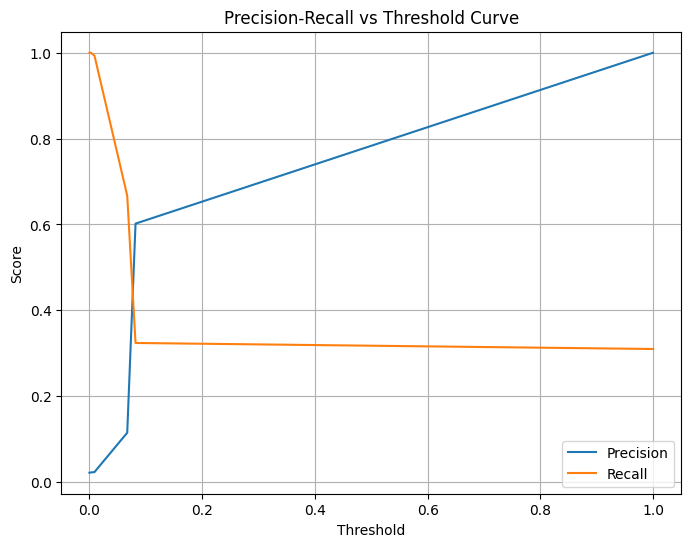

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precisions, recalls, thresholds_pr = precision_recall_curve(y_test, y_proba_tree)

plt.figure(figsize=(8, 6))
plt.plot(thresholds_pr, precisions[:-1], label='Precision')
plt.plot(thresholds_pr, recalls[:-1], label='Recall')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold Curve")
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

def print_binary_classification_metrics(y_true, y_pred, title=""):
    print(f"\nüìä Î∂ÑÎ•ò ÏÑ±Îä• ÌèâÍ∞Ä - {title}")
    print("-" * 40)

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    fallout = fp / (fp + tn) if (fp + tn) > 0 else 0

    print(f"Accuracy    : {acc:.4f}")
    print(f"Precision   : {prec:.4f}")
    print(f"Recall      : {rec:.4f}")
    print(f"F1 Score    : {f1:.4f}")
    print(f"Specificity : {specificity:.4f}")
    print(f"Fall-out    : {fallout:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=["Not Left AMA", "Left AMA"]))


In [ ]:
print_binary_classification_metrics(y_test, pred_test_tree_thresh, "ÏûÑÍ≥ÑÍ∞í: 0.1")



üìä Î∂ÑÎ•ò ÏÑ±Îä• ÌèâÍ∞Ä - ÏûÑÍ≥ÑÍ∞í: 0.1
----------------------------------------
Accuracy    : 0.9850
Precision   : 1.0000
Recall      : 0.3099
F1 Score    : 0.4732
Specificity : 1.0000
Fall-out    : 0.0000

Classification Report:
              precision    recall  f1-score   support

Not Left AMA       0.98      1.00      0.99     51260
    Left AMA       1.00      0.31      0.47      1139

    accuracy                           0.98     52399
   macro avg       0.99      0.65      0.73     52399
weighted avg       0.99      0.98      0.98     52399



In [ ]:
pred_test_tree_05 = (pred_tree_pos_proba >= 0.5).astype(int)
print_binary_classification_metrics(y_test, pred_test_tree_05, "ÏûÑÍ≥ÑÍ∞í: 0.5")



üìä Î∂ÑÎ•ò ÏÑ±Îä• ÌèâÍ∞Ä - ÏûÑÍ≥ÑÍ∞í: 0.5
----------------------------------------
Accuracy    : 0.9850
Precision   : 1.0000
Recall      : 0.3099
F1 Score    : 0.4732
Specificity : 1.0000
Fall-out    : 0.0000

Classification Report:
              precision    recall  f1-score   support

Not Left AMA       0.98      1.00      0.99     51260
    Left AMA       1.00      0.31      0.47      1139

    accuracy                           0.98     52399
   macro avg       0.99      0.65      0.73     52399
weighted avg       0.99      0.98      0.98     52399



In [ ]:
precisions

[0.02173705605068799,
 0.11483831973405863,
 0.11483831973405863,
 0.11483831973405863,
 0.11483831973405863,
 0.11483831973405863,
 0.11483831973405863,
 0.601957585644372,
 0.601957585644372,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [ ]:
recalls

[1.0,
 0.6672519754170325,
 0.6672519754170325,
 0.6672519754170325,
 0.6672519754170325,
 0.6672519754170325,
 0.6672519754170325,
 0.32396839332748023,
 0.32396839332748023,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.30

In [ ]:
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [ ]:
import pandas as pd
prc_df = pd.DataFrame({
    "threshold":thresholds,
    "recall": recalls,
    "precision": precisions
})
prc_df.set_index('threshold', inplace=True)
# pd.set_option('display.max_rows', None)
prc_df
# thresholdÍ∞Ä Ïª§ÏßÄÎ©¥ precisionÏù¥ Ïò¨ÎùºÍ∞ÄÍ≥† recallÏùÄ Îñ®Ïñ¥ÏßÑÎã§.
# thresholdÍ∞Ä ÏûëÏïÑÏßÄÎ©¥ recallÏù¥ Ïò¨ÎùºÍ∞ÄÍ≥† precisionÏùÄ Îñ®Ïñ¥ÏßÑÎã§.



#### 0.09 ÏóêÏÑú precisionÏù¥ 1Ïù¥ ÎêúÎã§. 

recall  precision
threshold                     
0.00       1.000000   0.021737
0.01       0.667252   0.114838
0.02       0.667252   0.114838
0.03       0.667252   0.114838
0.04       0.667252   0.114838
...             ...        ...
0.96       0.309921   1.000000
0.97       0.309921   1.000000
0.98       0.309921   1.000000
0.99       0.309921   1.000000
1.00       0.309921   1.000000

[101 rows x 2 columns]

In [ ]:
prc_df.loc[0.09]


recall       0.309921
precision    1.000000
Name: 0.09, dtype: float64

In [ ]:
# 0.1 Ïù¥ÏÉÅ 0.3 Ïù¥Ìïò Íµ¨Í∞ÑÎßå Î≥¥Í∏∞
prc_df.loc[0.07:0.11]


recall  precision
threshold                     
0.07       0.323968   0.601958
0.08       0.323968   0.601958
0.09       0.309921   1.000000
0.10       0.309921   1.000000
0.11       0.309921   1.000000

In [ ]:
# recall Í∞íÏù¥ 0.8 Ïù¥ÏÉÅÏù∏ ÌñâÎßå ÌïÑÌÑ∞ÎßÅ
high_recall_df = prc_df[prc_df['recall'] >= 0.8]

# Í≤∞Í≥º ÌôïÏù∏
print(high_recall_df)


           recall  precision
threshold                   
0.0           1.0   0.021737


In [ ]:
high_recall_precision_df = prc_df[
    (prc_df['recall'] >= 0.8) & (prc_df['precision'] >= 0.2)
]

print(high_recall_precision_df)


Empty DataFrame
Columns: [recall, precision]
Index: []


In [ ]:
# f1 Ï†êÏàòÎ•º ÏßÅÏ†ë Í≥ÑÏÇ∞ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï∂îÍ∞Ä
prc_df['f1'] = 2 * (prc_df['precision'] * prc_df['recall']) / (prc_df['precision'] + prc_df['recall'] + 1e-10)

# f1Ïù¥ ÏµúÎåÄÏù∏ threshold ÌôïÏù∏
best_f1_row = prc_df.loc[prc_df['f1'].idxmax()]
print("üìå F1 ScoreÍ∞Ä Í∞ÄÏû• ÎÜíÏùÄ threshold Ï†ïÎ≥¥:")
print(best_f1_row)


üìå F1 ScoreÍ∞Ä Í∞ÄÏû• ÎÜíÏùÄ threshold Ï†ïÎ≥¥:
recall       0.309921
precision    1.000000
f1           0.473190
Name: 0.09, dtype: float64


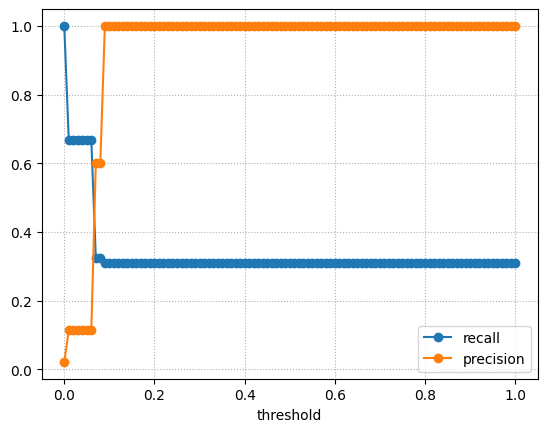

In [ ]:
prc_df.plot(marker='o');
plt.grid(True, linestyle=":")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# ÏÇ¨Ïö©Ìï† ÏûÑÍ≥ÑÍ∞í Î¶¨Ïä§Ìä∏ (0 ~ 1ÍπåÏßÄ 0.01 Îã®ÏúÑ)
thresholds = np.arange(0.0, 1.01, 0.01)

# Í≤∞Í≥º Ï†ÄÏû•Ïö© Î¶¨Ïä§Ìä∏
precisions, recalls, f1s, specificities, fallouts = [], [], [], [], []

for thresh in thresholds:
    y_pred_thresh = (pred_tree_pos_proba >= thresh).astype(int)
    
    # Í∏∞Î≥∏ ÏßÄÌëú
    precisions.append(precision_score(y_test, y_pred_thresh, zero_division=0))
    recalls.append(recall_score(y_test, y_pred_thresh, zero_division=0))
    f1s.append(f1_score(y_test, y_pred_thresh, zero_division=0))

    # ÌòºÎèô ÌñâÎ†¨ÏóêÏÑú Specificity, Fall-out Í≥ÑÏÇ∞
    cm = confusion_matrix(y_test, y_pred_thresh)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    fallout = fp / (fp + tn) if (fp + tn) > 0 else 0
    specificities.append(specificity)
    fallouts.append(fallout)


In [ ]:
# plt.figure(figsize=(12, 7))
# plt.plot(thresholds, precisions, label='Precision')
# plt.plot(thresholds, recalls, label='Recall')
# plt.plot(thresholds, f1s, label='F1 Score')
# plt.plot(thresholds, specificities, label='Specificity')
# plt.plot(thresholds, fallouts, label='Fall-out')

# plt.axvline(0.5, color='gray', linestyle='--', label='Threshold = 0.5')
# plt.xlabel("Threshold")
# plt.ylabel("Score")
# plt.title("üìä ÏÑ±Îä• ÏßÄÌëú vs ÏûÑÍ≥ÑÍ∞í Î≥ÄÌôî Í≥°ÏÑ†")
# plt.legend()
# plt.grid()
# plt.tight_layout()
# plt.show()


In [ ]:
##### DecisionTreeÏùò PrecisionRecall Ïª§Î∏å Í∑∏Î¶¨Í∏∞ + AP Score Í≥ÑÏÇ∞.
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, average_precision_score
import matplotlib.pyplot as plt


# DecisionTree ÌååÏù¥ÌîÑÎùºÏù∏ÏóêÏÑú ÌôïÎ•† ÏòàÏ∏°
test_proba_tree = tree_pipeline.predict_proba(X_test)[:, 1]

# RandomForest ÌååÏù¥ÌîÑÎùºÏù∏ÏóêÏÑú ÌôïÎ•† ÏòàÏ∏°
test_proba_rfc = rfc_pipeline.predict_proba(X_test)[:, 1]

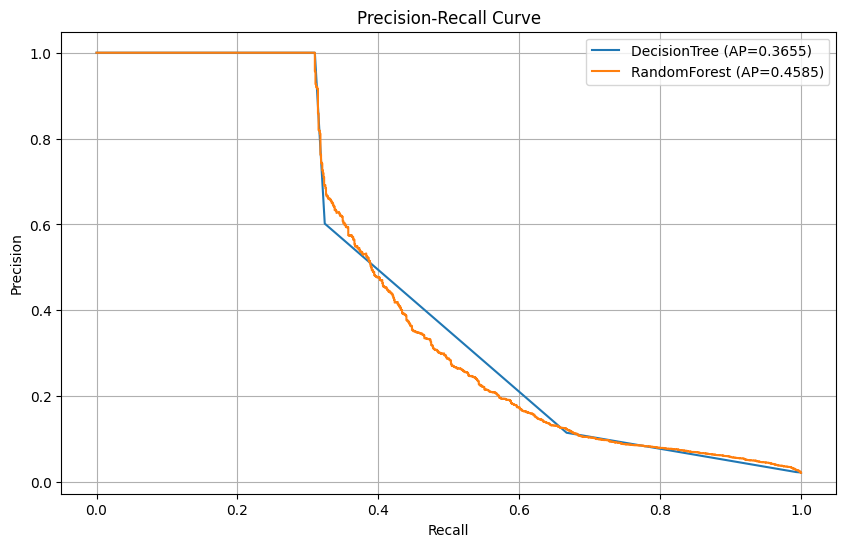

In [ ]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, average_precision_score
import matplotlib.pyplot as plt

# ÌôïÎ•† ÏòàÏ∏° (pipeline Í∏∞Î∞ò)
test_proba_tree = tree_pipeline.predict_proba(X_test)[:, 1]
test_proba_rfc = rfc_pipeline.predict_proba(X_test)[:, 1]

# Precision-Recall curve
prec_tree, rec_tree, _ = precision_recall_curve(y_test, test_proba_tree)
prec_rfc, rec_rfc, _ = precision_recall_curve(y_test, test_proba_rfc)

# Average Precision Score (AP Score)
ap_tree = average_precision_score(y_test, test_proba_tree)
ap_rfc = average_precision_score(y_test, test_proba_rfc)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.plot(rec_tree, prec_tree, label=f"DecisionTree (AP={ap_tree:.4f})")
plt.plot(rec_rfc, prec_rfc, label=f"RandomForest (AP={ap_rfc:.4f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()


In [111]:
from sklearn.metrics import precision_recall_curve, average_precision_score, PrecisionRecallDisplay
import matplotlib.pyplot as plt


In [112]:
# RandomForestClassifier ÌôïÎ•† ÏòàÏ∏°
proba_rfc = rfc_pipeline.predict_proba(X_test)[:, 1]  # ÏñëÏÑ± ÌÅ¥ÎûòÏä§ ÌôïÎ•†


In [113]:
# Precision-Recall Í≥°ÏÑ† Í≥ÑÏÇ∞
precision, recall, thresholds = precision_recall_curve(y_test, proba_rfc)

# AP Score Í≥ÑÏÇ∞
ap_score = average_precision_score(y_test, proba_rfc)
print(f"üìå Average Precision (AP) Score: {ap_score:.4f}")


üìå Average Precision (AP) Score: 0.4585


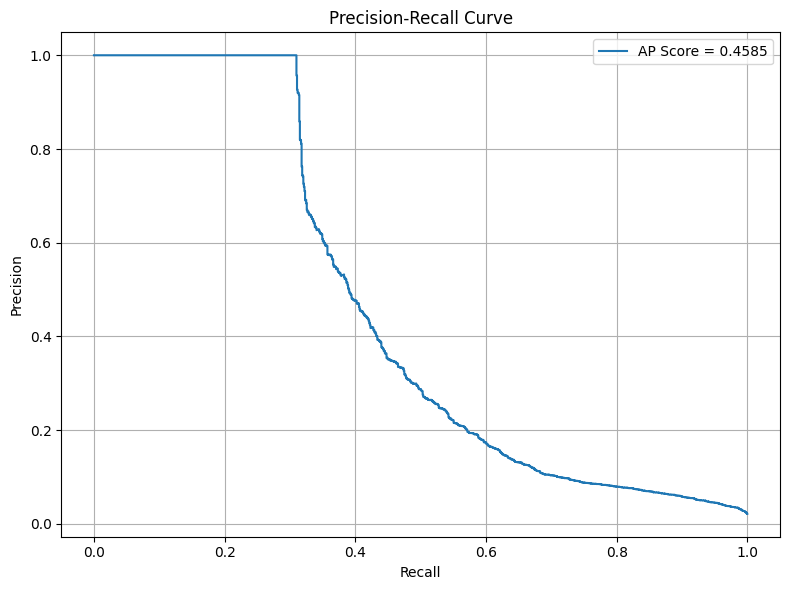

In [114]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"AP Score = {ap_score:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds_roc = roc_curve(y_test, y_proba_tree)
auc_score = roc_auc_score(y_test, y_proba_tree)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Í∏∞Ï§ÄÏÑ†
plt.xlabel("False Positive Rate (Fall-out)")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid()
plt.show()


/Users/jangjinseul/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


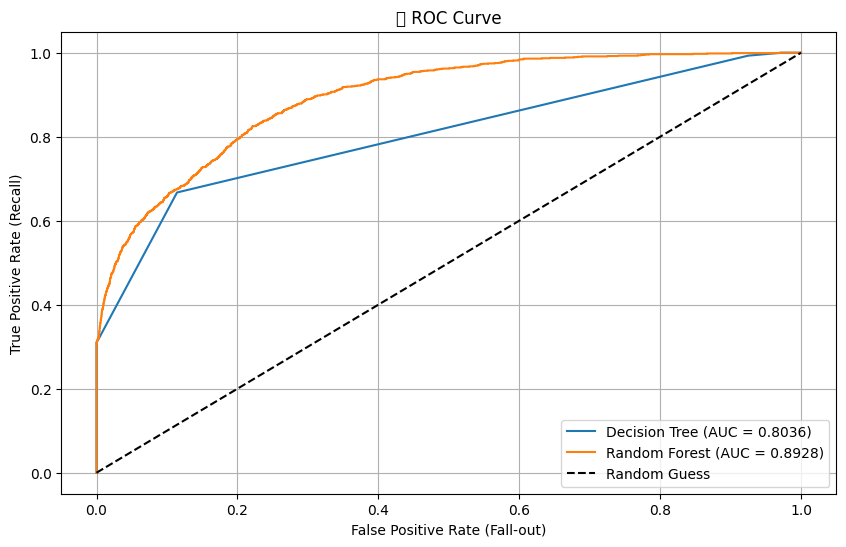

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ÌôïÎ•† ÏòàÏ∏° (pipeline Í∏∞Î∞ò)
test_proba_tree = tree_pipeline.predict_proba(X_test)[:, 1]
test_proba_rfc = rfc_pipeline.predict_proba(X_test)[:, 1]

# ROC Curve
fpr_tree, tpr_tree, _ = roc_curve(y_test, test_proba_tree)
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, test_proba_rfc)

# AUC Score
auc_tree = roc_auc_score(y_test, test_proba_tree)
auc_rfc = roc_auc_score(y_test, test_proba_rfc)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree (AUC = {auc_tree:.4f})")
plt.plot(fpr_rfc, tpr_rfc, label=f"Random Forest (AUC = {auc_rfc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")  # ÎåÄÍ∞ÅÏÑ† Í∏∞Ï§ÄÏÑ†

plt.xlabel("False Positive Rate (Fall-out)")
plt.ylabel("True Positive Rate (Recall)")
plt.title("üìä ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


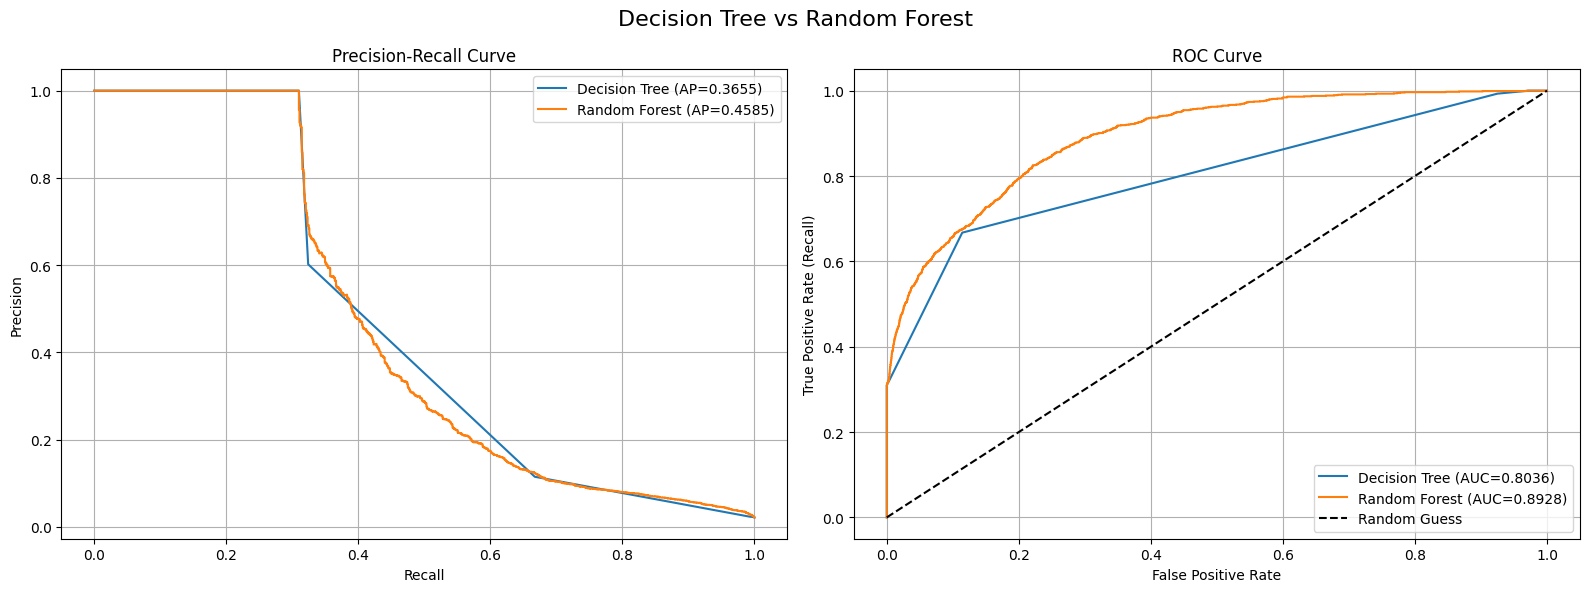

In [109]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# threshold ÌõÑÎ≥¥
thresholds = np.arange(0.0, 1.01, 0.01)

# Í≤∞Í≥º Ï†ÄÏû•
precisions = []
recalls = []
f1s = []

for thresh in thresholds:
    preds_thresh = (proba_rfc >= thresh).astype(int)  # RFC Í∏∞Ï§Ä (ÏõêÌïòÏãúÎ©¥ treeÎ°ú Î∞îÍøîÎèÑ Îê®)
    
    precisions.append(precision_score(y_test, preds_thresh, zero_division=0))
    recalls.append(recall_score(y_test, preds_thresh, zero_division=0))
    f1s.append(f1_score(y_test, preds_thresh, zero_division=0))

# F1 Score ÏµúÎåÄÏùº ÎïåÏùò threshold
best_idx = np.argmax(f1s)
best_thresh = thresholds[best_idx]
best_f1 = f1s[best_idx]


/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_98489/3702791693.py:17: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_98489/3702791693.py:17: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_98489/3702791693.py:17: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_98489/3702791693.py:17: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/jangjinseul/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jan

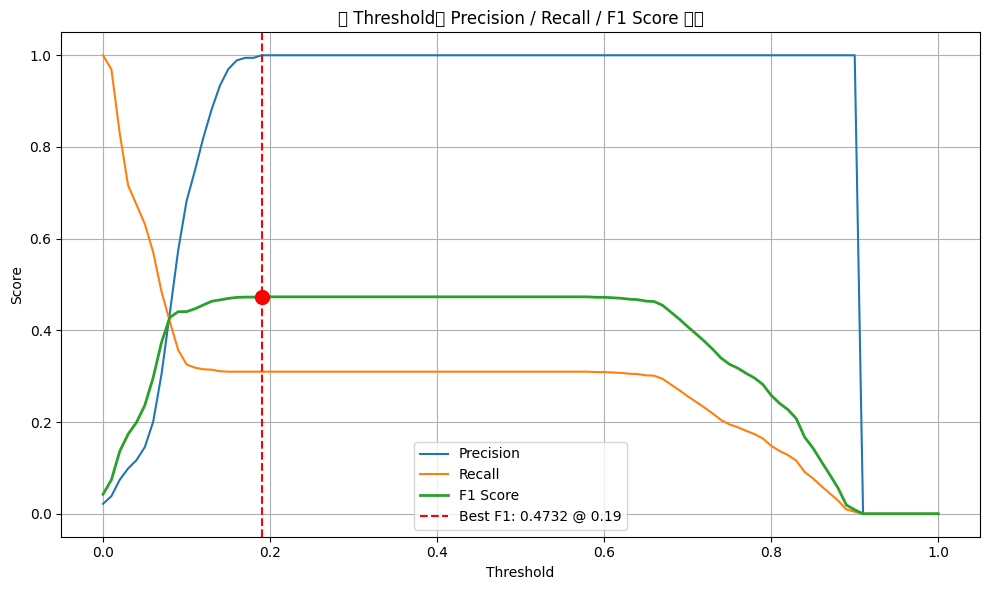

In [110]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, f1s, label="F1 Score", linewidth=2)

# ÏµúÏ†Å threshold ÎßàÏª§ ÌëúÏãú
plt.axvline(best_thresh, color='red', linestyle='--', label=f'Best F1: {best_f1:.4f} @ {best_thresh:.2f}')
plt.scatter([best_thresh], [best_f1], color='red', s=100, zorder=5)

plt.title("üìà ThresholdÎ≥Ñ Precision / Recall / F1 Score Î≥ÄÌôî")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [108]:
import pickle
import os

saved_dir = 'models'
with open(os.path.join(saved_dir, 'TotalProfit_rfr_model.pkl'), 'wb') as fw:
    pickle.dump(target_model, fw)

FileNotFoundError: [Errno 2] No such file or directory: 'models/TotalProfit_rfr_model.pkl'

In [ ]:
import pandas as pd
import numpy as np

imp_df = pd.DataFrame(target_model.feature_importances_)

imp_df.sort_values(by=0, ascending=False).head(10)


0
12  0.176529
24  0.093962
25  0.093472
13  0.091837
23  0.078753
8   0.050192
15  0.040148
6   0.037940
1   0.037121
9   0.036161

In [ ]:
df.columns[[12, 24, 25, 13, 23, 8, 15, 6, 1, 9]]

Index(['Discharge Year', 'APR Medical Surgical Description',
       'Source of Payment 1', 'CCS Diagnosis Code', 'APR Risk of Mortality',
       'Ethnicity', 'CCS Procedure Code', 'Gender', 'Hospital County',
       'Length of Stay'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt

mse

# plt.figure(figsize=(20, 10))
# plt.scatter(y_test, pred, marker='o')
# plt.xlabel('True Values')
# plt.ylabel('Predictions')
# plt.title('True vs Predicted Values')
# plt.legend()
# plt.show()

pred.size

10000

array([0, 0, 0, ..., 0, 0, 0], shape=(2619918,))